In [1]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 12, 'weight':'bold'}
#font= {"family":"Courier New"}
matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
import mdtraj as md
import os
import math

In [2]:
def extract_specific_dihedral(ref_pdb,traj_dcd):
    residues_list = []
    ref_structure = md.load(ref_pdb)
    atom_indexes = ref_structure.topology.select('chainid 0')    
    trajectory = md.load(traj_dcd,top = ref_structure,atom_indices = atom_indexes,stride=1)
    trajectory.superpose(trajectory, frame = 0)
    
    indices_1, angles_chi1 = md.compute_chi1(trajectory)
    for indice in indices_1:
        residues_list.append(str(ref_structure.topology.atom(indice[0])).split('-')[0])
    data ={}
    for res in residues_list:
        data[res] = []
    for a in range(angles_chi1.shape[0]):
        for i in range(len(residues_list)):
            res = residues_list[i]
            data[res].append(angles_chi1[a][i])
    return data
    
def extract_specific_dihedral_1(ref_pdb,traj_dcd):
    residues_list = []
    ref_structure = md.load(ref_pdb)
    #atom_indexes = ref_structure.topology.select('chainid 1')    
    trajectory = md.load(traj_dcd,top = ref_structure,stride=1)#atom_indices = atom_indexes,
    trajectory.superpose(trajectory, frame = 0)
    
    indices_1, angles_chi1 = md.compute_chi1(trajectory)
    for indice in indices_1:
        residues_list.append(str(ref_structure.topology.atom(indice[0])).split('-')[0])
    data ={}
    
    for res in residues_list:
        data[res] = []
    
    total_angle_length = angles_chi1.shape[0]
    total_residue_length = len(residues_list)
    for a in range(total_angle_length):
        for i in range(total_residue_length):
            res = residues_list[i]
            data[res].append(angles_chi1[a][i])
            
    return data

def angle_unit(angles):
    convert_angles=[]
    for a in angles:
        a_deg = math.degrees(float(a))
        if a_deg < 0:
            a_deg += 360
            convert_angles.append(a_deg)
        else:
            convert_angles.append(a_deg)
    return convert_angles

def angle_unit_2(angles):
    convert_angles=[]
    for a in angles:
        a_deg = math.degrees(float(a))
        convert_angles.append(a_deg)
    return convert_angles

dict_keys(['GLU3', 'LYS4', 'ASP5', 'GLU6', 'LEU7', 'THR1'])


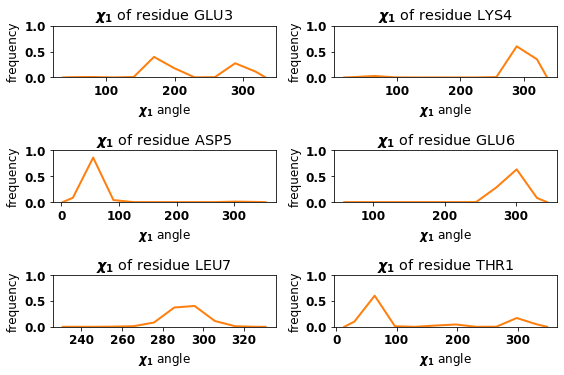

<Figure size 432x288 with 0 Axes>

In [3]:
os.chdir('/home/bxie/PycharmProjects/KDEL/kdel_simulation/trajectories')
#pdb_file = 'KDEL_taekdel_restrain_Resi4.pdb' 
pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.pdb')
traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd')
#traj_file = 'KDEL_taekdel_restrain.dcd'
angles = extract_specific_dihedral(pdb_file,traj_file)
print (angles.keys())

peptide_residues = ['GLU3', 'LYS4', 'ASP5', 'GLU6', 'LEU7' ]

a_pdb_file = 'KDEL_xtal_restrain_Resi4.pdb' 
a_traj_file = 'KDEL_xtal_restrain.dcd'
a_angles = extract_specific_dihedral_1(a_pdb_file,a_traj_file)
a_data = {}
for p in peptide_residues:
    a_data[p] = a_angles[p]
    
rep1_pdb_file = 'KDEL_xtal_restrain_Resi4.pdb' 
rep1_traj_file = 'KDEL_xtal_restrain_rep1.dcd'
rep1_angles = extract_specific_dihedral_1(rep1_pdb_file,rep1_traj_file)
rep1_data = {}
for p in peptide_residues:
    rep1_data[p] = rep1_angles[p]
    
rep2_pdb_file = 'KDEL_xtal_restrain_Resi4.pdb' 
rep2_traj_file = 'KDEL_xtal_restrain_rep2.dcd'
rep2_angles = extract_specific_dihedral_1(rep2_pdb_file,rep2_traj_file)
rep2_data = [rep2_angles[p] for p in peptide_residues]

rep2_data = {}
for p in peptide_residues:
    rep2_data[p] = rep2_angles[p]
    
    
plot_index=1
plt.figure(figsize=(8,10))#
for i in range(len(list(angles.keys()))):
    plt.subplot(len(angles.keys()),2, plot_index)
    key = list(angles.keys())[i]
    data = angles[key]
    chi1 = angle_unit(data)
    n,bins,patches = plt.hist(chi1,density=True, alpha=0.0)
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        values.append(float(_n)/np.sum(n))
    values.append(0)
    plt.title('$\chi_1$ of residue '+key)
    plt.plot([b for b in bincenters], values, linewidth=2)
    plot_index+=1

    plt.ylabel('frequency')
    plt.ylim(0,1)
    
    plt.xlabel('$\chi_1$ angle')
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()
plt.clf()




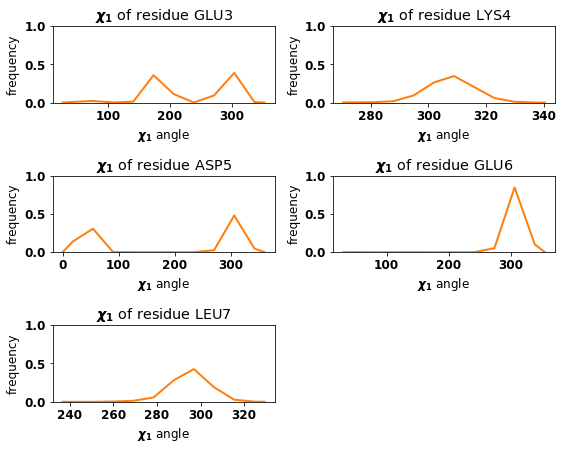

<Figure size 432x288 with 0 Axes>

In [4]:
plot_index=1
plt.figure(figsize=(8,10))#
for i in range(len(list(a_data.keys()))):
    plt.subplot(len(a_data.keys()),2, plot_index)
    key = list(a_data.keys())[i]
    data = a_data[key]
    chi1 = angle_unit(data)
    n,bins,patches = plt.hist(chi1,density=True, alpha=0.0)
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        values.append(float(_n)/np.sum(n))
    values.append(0)
    plt.title('$\chi_1$ of residue '+key)
    plt.plot([b for b in bincenters], values, linewidth=2)
    plot_index+=1

    plt.ylabel('frequency')
    plt.ylim(0,1)
    
    plt.xlabel('$\chi_1$ angle')
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()
plt.clf()

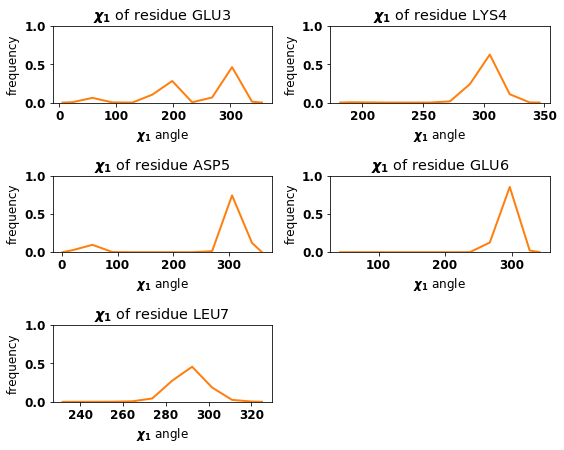

<Figure size 432x288 with 0 Axes>

In [5]:
plot_index=1
plt.figure(figsize=(8,10))#
for i in range(len(list(rep1_data.keys()))):
    plt.subplot(len(rep1_data.keys()),2, plot_index)
    key = list(rep1_data.keys())[i]
    data = rep1_data[key]
    chi1 = angle_unit(data)
    n,bins,patches = plt.hist(chi1,density=True, alpha=0.0)
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        values.append(float(_n)/np.sum(n))
    values.append(0)
    plt.title('$\chi_1$ of residue '+key)
    plt.plot([b for b in bincenters], values, linewidth=2)
    plot_index+=1

    plt.ylabel('frequency')
    plt.ylim(0,1)
    
    plt.xlabel('$\chi_1$ angle')
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()
plt.clf()

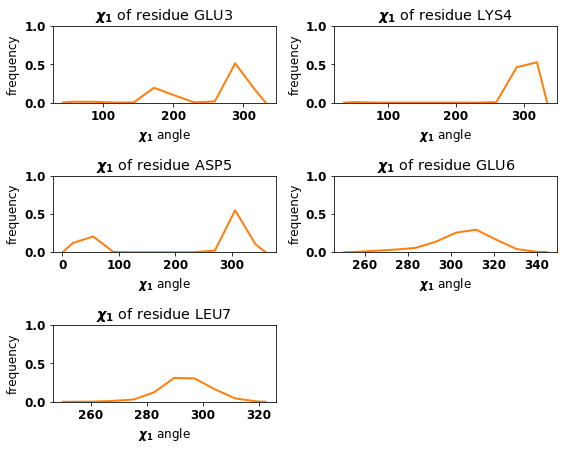

<Figure size 432x288 with 0 Axes>

In [6]:
plot_index=1
plt.figure(figsize=(8,10))#
for i in range(len(list(rep2_data.keys()))):
    plt.subplot(len(rep2_data.keys()),2, plot_index)
    key = list(rep2_data.keys())[i]
    data = rep2_data[key]
    chi1 = angle_unit(data)
    n,bins,patches = plt.hist(chi1,density=True, alpha=0.0)
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        values.append(float(_n)/np.sum(n))
    values.append(0)
    plt.title('$\chi_1$ of residue '+key)
    plt.plot([b for b in bincenters], values, linewidth=2)
    plot_index+=1

    plt.ylabel('frequency')
    plt.ylim(0,1)
    
    plt.xlabel('$\chi_1$ angle')
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()
plt.clf()

In [7]:
dihedral_3 = angles['ASP5']+a_data['ASP5']+rep1_data['ASP5']+rep2_data['ASP5']
dihedral_2 = angles['GLU6']+a_data['GLU6']+rep1_data['GLU6']+rep2_data['GLU6']


In [8]:
colors = ['blue','orange']
def bootstrapping(data):
    total_data =[]
    for _ in range(100): # repeat 100 times 
        random_number = np.random.choice(len(data), len(data))
        rearrange_data = [data[r] for r in random_number]
        for r in rearrange_data:
            total_data.append(r)
    return total_data



14 -52.32385361432664
13 -55.41433048166874
12 -58.50480734901083
15 -49.23337674698455
49 55.84283674264674
48 52.752359875304634
47 49.661883007962544
50 58.93331360998884
16 -46.14289987964244
11 -61.59528421635292


11 -68.90896267016228


<Figure size 432x288 with 0 Axes>

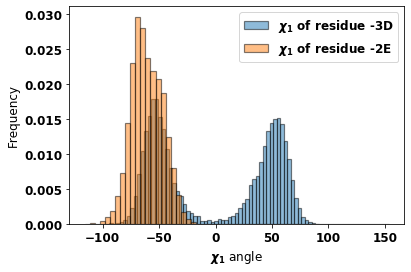

In [9]:
def hist1D_bar(data, index,label_text):

    n,bins,patches = plt.hist(data,bins = 60,density=True, alpha=0.5,label =label_text,edgecolor='black', linewidth=1.2 )
    
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        #values.append(float(_n)/np.sum(n))
        values.append(float(_n))
    values.append(0)
    return bincenters,values

plt.clf()
plot_index=1
plt.figure()
dist = bootstrapping(dihedral_3)
label_context = '$\chi_1$ of residue -3D'
bincenters,values = hist1D_bar(angle_unit_2(dist), 0, label_context)
#print (bincenters)
sorted_values = sorted(values)[::-1]
for index in range(10):
    for i in range(len(values)):
        if values[i] == sorted_values[index]:
            print (i,bincenters[i])
            
dist_2 = bootstrapping(dihedral_2)
label_context = '$\chi_1$ of residue -2E'
bincenters_2,values_2 = hist1D_bar(angle_unit_2(dist_2), -1, label_context)

print ('\n')
sorted_values_2 = sorted(values_2)[::-1]
for index in range(1):
    for i in range(len(values_2)):
        if values_2[i] == sorted_values_2[index]:
            print(i, bincenters_2[i])

plt.xlabel('$\chi_1$ angle')
plt.ylabel('Frequency')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(loc='upper right')
plt.show()

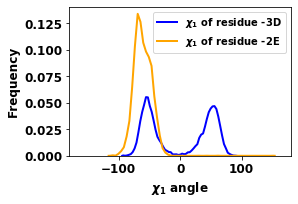

In [10]:
def hist1D(data, index,label_text):
    n,bins,patches = plt.hist(data,bins = 60, density=True, alpha=0.0)
    bincenters = [bins[0]]
    tem = 0.5 * (bins[1:]+bins[:-1])
    for b in tem:
        bincenters.append(b)
    bincenters.append(bins[-1])
    values = [0]
    for _n in n:
        values.append(float(_n)/np.sum(n))
    values.append(0)
    plt.plot([b for b in bincenters], values, linewidth=2,color= colors[index],label = label_text)
    return bincenters,values

plot_index=1
plt.figure(figsize=(4.3,3))
dist = bootstrapping(dihedral_3)
label_context = '$\chi_1$ of residue -3D'
bincenters,values = hist1D(angle_unit_2(dist), 0, label_context)
#plt.plot([bincenters[14],bincenters[14]],[0, 0.028],color= 'red',lw=1)
#plt.plot([bincenters[46],bincenters[46]],[0, 0.028],color= 'red',lw=1)

dist_2 = bootstrapping(dihedral_2)
label_context = '$\chi_1$ of residue -2E'
bincenters_2,values_2 = hist1D(angle_unit_2(dist_2), -1, label_context)
#plt.plot([bincenters_2[22],bincenters_2[22]],[0, 0.028],color= 'red',lw=1)

plt.xlim(-180,180)
plt.xlabel('$\chi_1$ angle', **font)
plt.ylabel('Frequency',**font)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(loc='upper right',fontsize = 10)
plt.tight_layout()
plt.savefig('/home/bxie/peptide_dihedral.png')
plt.show()
